In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df["class"].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

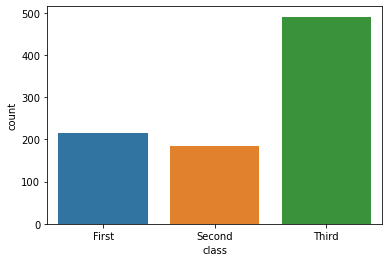

In [5]:
sns.countplot(data=df, x="class")

<AxesSubplot:xlabel='count', ylabel='class'>

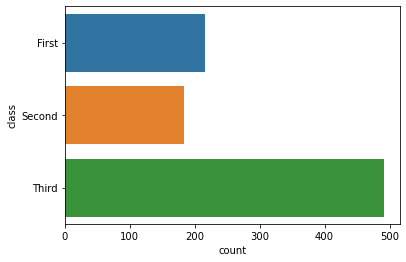

In [6]:
sns.countplot(data=df, y="class")

In [9]:
df1 = df.groupby(["sex","class"])["survived"].mean().to_frame()
df1

survived
sex    class           
female First   0.968085
       Second  0.921053
       Third   0.500000
male   First   0.368852
       Second  0.157407
       Third   0.135447

In [11]:
df2 = df.groupby(["sex","class"])["survived"].std().to_frame()
df2.columns = ["survived_std"]
df2

survived_std
sex    class               
female First       0.176716
       Second      0.271448
       Third       0.501745
male   First       0.484484
       Second      0.365882
       Third       0.342694

In [13]:
import pandas as pd

In [14]:
pd.concat([df1, df2], axis=1)

survived  survived_std
sex    class                         
female First   0.968085      0.176716
       Second  0.921053      0.271448
       Third   0.500000      0.501745
male   First   0.368852      0.484484
       Second  0.157407      0.365882
       Third   0.135447      0.342694

<AxesSubplot:xlabel='sex', ylabel='survived'>

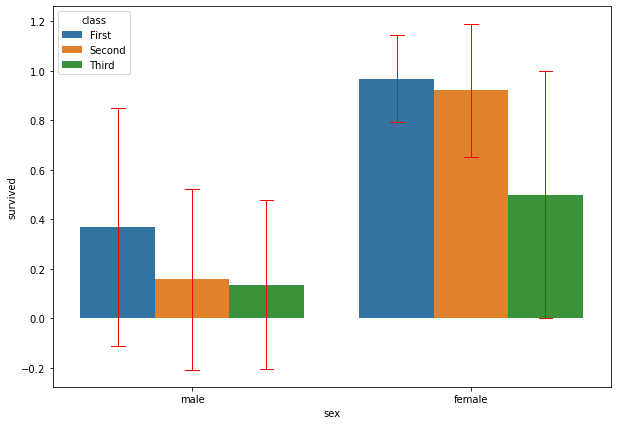

In [22]:
plt.figure(figsize=(10,7))
sns.barplot(data=df, x="sex", y="survived", hue="class", ci="sd", errcolor="red", errwidth=1, capsize=0.05)

In [25]:
df = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
df.head(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK
42,19.5,4.095,5.655,15.990,15.795,767.91,155.57,TN
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX


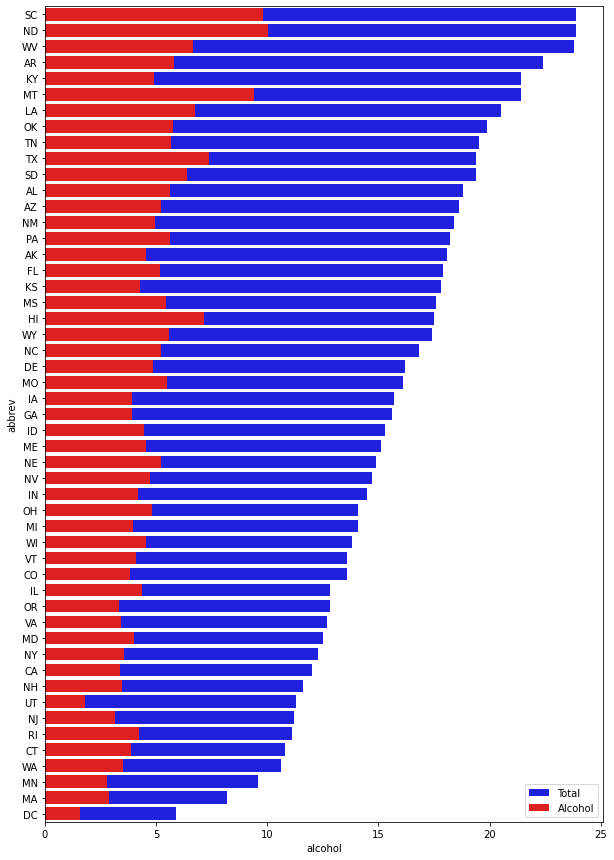

In [31]:
plt.figure(figsize=(10,15))
sns.barplot(data=df, x="total", y="abbrev", color="blue", label="Total")
sns.barplot(data=df, x="alcohol", y="abbrev", color="red", label="Alcohol")
plt.legend()